# Self Organising Map Challenge

## The Kohonen Network

The Kohonen Self Organising Map (SOM) provides a data visualization technique which helps to understand high dimensional data by reducing the dimensions of data to a map. SOM also represents clustering concept by grouping similar data together.

Unlike other learning technique in neural networks, training a SOM requires no target vector. A SOM learns to classify the training data without any external supervision.

![Network](kohonen.png)

### Structure
A network has a width and a height that descibes the grid of nodes.  For example, the grid may be 4x4, and so there would be 16 nodes.

Each node has a weight for each value in the input vector.  A weight is simply a float value that the node multiplies the input value by to determine how influential it is (see below)

Each node has a set of weights that match the size of the input vector.  For example, if the input vector has 10 elements, each node would have 10 weights.

### Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.
    

### Calculating the Best Matching Unit (BMU)

To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU.

The Euclidean distance $\mathsf{distance}_{i}$ (from the input vector $V$ to the $i$th node's weights $W_i$)is given as (using Pythagoras):

$$ \mathsf{distance}_{i}=\sqrt{\sum_{k=0}^{k=n}(V_k - W_{i_k})^2}$$

where V is the current input vector and $W_i$ is the node's weight vector.  $n$ is the size of the input & weight vector.

*Note*: $V$ and $W$ are vectors.  $V$ is the input vector, and $W_i$ is the weight vector of the $i$th node.  $V_k$ and $W_{i_k}$ represent the $k$'th value within those vectors.  

The BMU is the node with the minimal distance for the current input vector

### Calculating the Neighbourhood Radius

The next step is to calculate which of the other nodes are within the BMU's neighbourhood. All these nodes will have their weight vectors altered.

First we calculate what the radius of the neighbourhood should be and then use Pythagoras to determine if each node is within the radial distance or not.

A unique feature of the Kohonen learning algorithm is that the area of the neighbourhood shrinks over time. To do this we use the exponential decay function:

Given a desired number of training iterations $n$:
$$n_{\mathsf{max iterations}} = 100$$

Calculate the radius $\sigma_t$ at iteration number $t$:

$$\sigma_t = \sigma_0 \exp\left(- \frac{t}{\lambda} \right) \qquad t = 1,2,3,4... $$

Where $\sigma_0$ denotes the neighbourhood radius at iteration $t=0$, $t$ is the current iteration. We define $\sigma_0$ (the initial radius) and $\lambda$ (the time constant) as below:

$$\sigma_0 = \frac{\max(width,height)}{2} \qquad \lambda = \frac{n_{\mathsf{max iterations}}}{\log(\sigma_0)} $$

Where $width$ & $height$ are the width and height of the grid.

### Calculating the Learning Rate

We define the initial leanring rate $\alpha_0$ at iteration $t = 0$ as:
$$\alpha_0 = 0.1$$

So, we can calculate the learning rate at a given iteration t as:

$$\alpha_t = \alpha_0 \exp \left(- \frac{t}{\lambda} \right) $$

where $t$ is the iteration number, $\lambda$ is the time constant (calculated above)
        
### Calculating the Influence

As well as the learning rate, we need to calculate the influence $\theta_t$ of the learning/training at a given iteration $t$.  

So for each node, we need to caclulate the euclidean distance $d_i$ from the BMU to that node.  Similar to when we calculate the distance to find the BMU, we use Pythagoras.  The current ($i$th) node's x position is given by $x(W_i)$, and the BMU's x position is, likewise, given by $x(Z)$.  Similarly, $y()$ returns the y position of a node.

$$ d_{i}=\sqrt{(x(W_i) - x(Z))^2 + (y(W_i) - y(Z))^2} $$

Then, the influence decays over time according to:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

Where $\sigma_t$ is the neighbourhood radius at iteration $t$ as calculated above. 

Note: You will need to come up with an approach to x() and y().


### Updating the Weights

To update the weights of a given node, we use:

$$W_{i_{t+1}} = W_{i_t} + \alpha_t \theta_t (V_t - W_{i_t})$$
        
So $W_{i_{t+1}}$ is the new value of the weight for the $i$th node, $V_t$ is the current value of the training data, $W_{i_t}$ is the current weight and $\alpha_t$ and $\theta_t$ are the learning rate and influence calculated above.

*Note*: the $W$ and $V$ are vectors 

### Example 10x10 network after 100 iterations

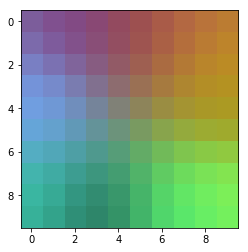

In [147]:
import matplotlib.pyplot as plt
plt.imshow(image_data)

### Example 100x100 network after 1000 iterations

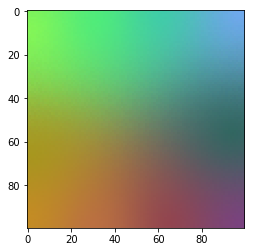

In [141]:
import matplotlib.pyplot as plt
plt.imshow(image_data)

## Challenge

Sam has written an implementation of a Self Organising Map. Consider the following criteria when assessing Sam's code:

- Could the code be made more efficient? A literal interpretation of the instructions above is not necessary.
- Is the code best structured for later use by other developers and in anticipation of productionisation?
- How would you approach productionising this application?
- Anything else you think is relevant.

In [ ]:
# kohonen.py
import matplotlib.pyplot as plt
import numpy as np

def train(input_data, n_max_iterations, width, height):
    σ0 = max(width, height) / 2
    α0 = 0.1
    weights = np.random.random((width, height, 3))
    λ = n_max_iterations / np.log(σ0)
    for t in range(n_max_iterations):
        σt = σ0 * np.exp(-t/λ)
        αt = α0 * np.exp(-t/λ)
        for vt in input_data:
            bmu = np.argmin(np.sum((weights - vt) ** 2, axis=2))
            bmu_x, bmu_y = np.unravel_index(bmu, (width, height))
            for x in range(width):
                for y in range(height):
                    di = np.sqrt(((x - bmu_x) ** 2) + ((y - bmu_y) ** 2))
                    θt = np.exp(-(di ** 2) / (2*(σt ** 2)))
                    weights[x, y] += αt * θt * (vt - weights[x, y])
    return weights

if __name__ == '__main__':
    # Generate data
    input_data = np.random.random((10,3))
    image_data = train(input_data, 100, 10, 10)

    plt.imsave('100.png', image_data)

    # Generate data
    input_data = np.random.random((10,3))
    image_data = train(input_data, 1000, 100, 100)

    plt.imsave('1000.png', image_data)


## Converting some changes and noting errors in the intial commits 

## 1. Could the code be made more efficient??

### a. Efficient way of computing BMU or winning neuron

```bash
distances = np.linalg.norm(self.weights - vector, axis=2)
np.unravel_index(np.argmin(distances), (self.width, self.height))
```

### b. Vectorizing the nested Loops

The nested loops for updating weights can be replaced with vectorized operations using NumPy, which significantly enhances performance

```bash
x, y = np.indices((self.width, self.height))
distance_grid = (x - bmu[0])**2 + (y - bmu[1])**2
theta = np.exp(-distance_grid / (2 * sigma_decay ** 2))[:, :, np.newaxis]
self.weights += alpha_decay * theta * (vector - self.weights)
```

In [8]:
import numpy as np
import matplotlib.pyplot as plt

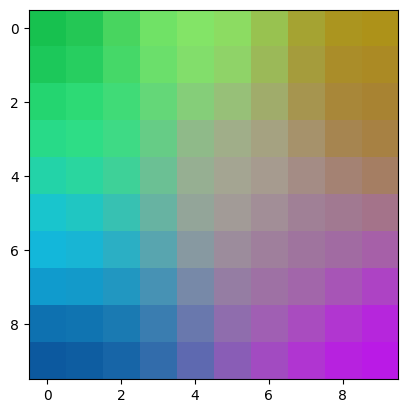

In [13]:
def train(input_data, n_max_iterations, width, height):
    σ0 = max(width, height) / 2
    α0 = 0.1
    weights = np.random.random((width, height, 3))
    λ = n_max_iterations / np.log(σ0)
    for t in range(n_max_iterations):

        for vt in input_data:
            # bmu = np.argmin(np.sum((weights - vt) ** 2, axis=2))
            σt = σ0 * np.exp(-t / λ)
            αt = α0 * np.exp(-t / λ)
            distances = np.linalg.norm(weights - vt, axis =2)
            bmu_x, bmu_y = np.unravel_index(np.argmin(distances), (width, height))
            x, y = np.indices((width, height))
            di = np.sqrt(((x - bmu_x) ** 2) + ((y - bmu_y) ** 2))[:, :, np.newaxis]
            θt = np.exp(-(di**2) / (2 * (σt**2)))
            weights[x, y] += αt * θt * (vt - weights[x, y])
    return weights

if __name__ == '__main__':
    # Generate data
    input_data = np.random.random((10,3))
    image_data = train(input_data, 100, 10, 10)

    plt.imshow(image_data)

## 2. Is the code best structured for later use by other developers and in anticipation of productionisation?

###  a. Object Oriented Code Writing

Encapsulate the SOM logic within a class to enhance reusability and maintainability:

```bash 

class SelfOrganizingMap:
    def __init__(self, width, height, input_dim, learning_rate=0.1, sigma=None):
        # Initialization code
        pass
        
    def train(self, data, num_iterations):
        # Training code
        pass
        
    def find_bmu(self, vector):
        # finding the winning neuron code
        pass
    
    
    def update_weights(self, vector, bmu, t, max_iter):
        # Weight update code
        pass

```

### b. Modularization of the code 
The current Script lacks modularity and scalability.

* data_loader.py: Handles data loading and preprocessing.

* som.py: Contains the Self-Organizing Map class and training methods.

* visualization.py: Handles all plotting and image saving functionalities.

* main.py: Serves as the entry point for training and evaluation.​



### c. Adopting Standard Project Structure

Follow the common practices for MLOps

```bash
project/
├── data/
│   ├── raw/                  # Raw input data
│   └── processed/            # Preprocessed data
├── models/                   # Saved model weights
├── notebooks/                # Jupyter notebooks for exploration
├── src/
│   ├── __init__.py
│   ├── data_loader.py        # Data loading and preprocessing
│   ├── som.py                # SOM class and training methods
│   ├── visualization.py      # Visualization utilities
│   └── main.py               # Entry point for training and evaluation
├── tests/                    # Unit and integration tests
├── requirements.txt          # Project dependencies
├── Dockerfile                # Docker configuration
└── README.md                 # Project documentation

## 3. How would you approach productionising this application?

### a. Implementing MLOps practices
Adopt MLops to streamline deployment and monitoring ML Models

* CI/CD pipelines: Building pipelines for testing and automatic deployment using tools likes GitHub Actions
* Model Versioning: Use MLflow or DVC to track both data versions and ML models.
* Monitoring: Implement monitoring for model performance using Grafana 

### b. Containerization
Package the application using Docker to ensure consistency across environments:

```bash 
FROM python:3.9-slim

WORKDIR /app

COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt

COPY . .

CMD ["python", "src/main.py"]

```

### c. Deploy Using Cloud Services
Leverage cloud platforms for scalability and reliability:​

* AWS: Use Amazon SageMaker for training and deploying models.
* GCP: Utilize Vertex AI for end-to-end ML workflows.
* Azure: Employ Azure Machine Learning for model management and deployment.



## 4. Anything else you think is relevant

### a. Implementing comprehensive testing to ensure reliability:​

* Unit Tests: Test individual functions and methods.

* Integration Tests: Test the interaction between different modules.

### b. Logging and Monitoring
Incorporating logging to facilitate debugging and monitoring:​

```bash 
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

logger.info("Training started")
```

Using monitoring tools to track application performance and detect anomalies.​

### c. Documentation

Maintaining thorough documentation to help future development and onboarding:​

* Code Comments: Have clear explainations of complex logic within the code.

* README: Providing an overview of the project, setup instructions, and usage examples.

* API Documentation: Using tools like SwaggerUI


In [47]:
## Kohonen SOM after modularization

import numpy as np

class SelfOrganisingMap():
    def __init__(self, width: int,
                 height: int,
                 input_dimension: int,
                 alpha: float = 0.1 ,
                 sigma =None):
        """Initializes the Self Organising Map
        The weights are initialized randomly between 0 and 1. The map is a 2D grid of neurons.


        Args:
            width (int): Width of the map
            height (int): Height of the map
            input_dimension (int): dimension of the data
            alpha (float, optional): _description_. Defaults to 0.1.
            sigma (_type_, optional): _description_. Defaults to max(width , height)/2.
            
        example usage:
            ```python
            som = SelfOrganisingMap(width= 10, height= 10, input_dimension= 3)
            ```
        """
        
        self.width = width
        self.height = height
        self.input_dimension = input_dimension
        self.alpha = alpha
        self.sigma = sigma or max(width, height) / 2
        self.weights = np.random.random((width, height, input_dimension))

    def find_bmu(self, vector: np.ndarray) -> tuple:
        """Find the best matching unit (BMU) for a given input vector.
        The BMU is the neuron whose weights are closest to the input vector in terms of Euclidean distance.

        Args:
            vector (np.ndarray): The input vector for which to find the BMU.

        Returns:
            tuple: returns the coordinates of the BMU in the 2D grid.
        The coordinates are in the form (x, y), where x is the width and y is the height of the map.
        
        example usage: 
            ```python
            som = SelfOrganisingMap(width = 10, height = 10, input_dimension= 3)
            bmu = som.find_bmu(vector)
            ```
        """
        distances = np.linalg.norm(self.weights - vector, axis=2)
        return np.unravel_index(np.argmin(distances), (self.width, self.height))

    def update_weights(self, vector: np.ndarray, bmu :tuple , t : int, max_iter: int) -> np.ndarray:
        """Updates the weights of the neurons in the map based on the input vector and the BMU.
        The weights are updated using a Gaussian neighborhood function and a learning rate that decays over time.
        The neighborhood function is defined by the distance between the BMU and the other neurons in the map.
        
        
        Args:
            vector (np.ndarray): The input vector used to update the weights. 
            bmu (tuple): The coordinates of the BMU on the map
            t (int): The current time step in the training process
            max_iter (int): The maximum number of iterations for the training process

        Returns:
            np.ndarray: Returns the updated weights of the neurons on the map. 
            
        example usage:
            ```python
            som = SelfOrganisingMap(width=10, height=10, input_dimension=3)
            som.update_weights(vector, bmu, t, max_iter)
            ```
        """
        lambda_val = max_iter / np.log(self.sigma)
        sigma_decay = self.sigma * np.exp(-t / lambda_val)
        alpha_decay = self.alpha * np.exp(-t / lambda_val)
        x, y = np.indices((self.width, self.height))
        distance_grid = (x - bmu[0])**2 + (y - bmu[1])**2
        theta = np.exp(-distance_grid / (2 * sigma_decay ** 2))[:, :, np.newaxis]
        self.weights += alpha_decay * theta * (vector - self.weights)
 
    def train(self, data: np.ndarray, num_iterations : int) -> np.ndarray:
        """Trains the self organising map based on the input data and number of iterations 

        Args:
            data (_type_): The input data used to train the SOM map.
            num_iterations (_type_): The number of iterations for the training the map

        Returns:
            _type_: Returns the trained weights of the neurons for the given metrics.
            
        Example usage:
            ```python
            som = SelfOrganisingMap(width=10, height=10, input_dimension=3)
            som.train(np.random.random((10, 3)),100)
            ```
        """
        for t in range(num_iterations):
            for vector in data:
                bmu = self.find_bmu(vector)
                self.update_weights(vector, bmu, t, num_iterations)
        
        return self.weights




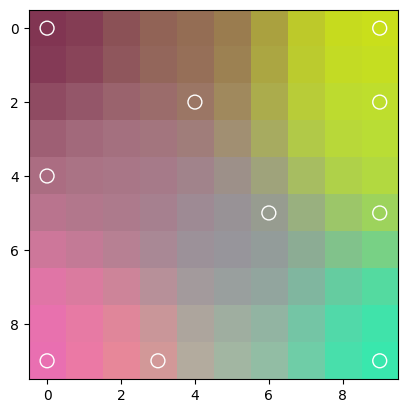

In [45]:

if __name__ == "__main__":
    som0 = SelfOrganisingMap(10, 10, 3)

    # data 10x10 , iteration 100
    data = np.random.random((10, 3))
    image_data_10 = som0.train(data, 100)

    plt.imshow(image_data_10)
    x = [plt.scatter(som0.find_bmu(v) [0], som0.find_bmu(v)[1], s =100 , edgecolors='w',c =np.zeros(0)) for v in data]